In [12]:
import pandas as pd   
import matplotlib.pyplot as plt  
import numpy as np    
from Bio.SeqUtils import ProtParam 
from collections import defaultdict


In [2]:
df = pd.read_csv('cdr_similarity_sabdab.csv')


In [3]:
df

,generated,sabdab,pdb_ID,distance,identity
0,TLRSGINVGTYRIY,TLRSGINVGTYRIY,6w7s,0.0,1.000000
1,MIWHSSAWV,AIWHSSAWV,6kva,1.0,0.888889
2,GKNYRPA,GKNYRPS,6fg2,1.0,0.857143
3,GASQRES,GASTRES,7jln,1.0,0.857143
4,DATTRAS,DASTRAS,7s8h,1.0,0.857143
...,...,...,...,...,...
427,SIIIGGGHGHPLILSN,SGGGSN,7e9b,10.0,0.375000
428,FEAQAGNAPVQFIIPD,ERGTGAPDAFNI,7umm,10.0,0.375000
429,DAPVNNFGNSGQGLLV,DSVWYTGSYGLIY,8cin,10.0,0.375000
430,DAPVNNWGSSGQGLLV,DSVWYTGSYGLIY,8cin,10.0,0.375000


In [10]:
def calculate_aa_distribution(sequence):
    """
    Calculate the amino acid distribution of a given protein sequence.
    Returns a dictionary where keys are amino acids and values are their frequencies.
    """
    aa_count = defaultdict(int)
    total_aa = 0
    for aa in sequence:
        aa_count[aa] += 1
        total_aa += 1
    aa_distribution = {aa: count / total_aa for aa, count in aa_count.items()}
    return aa_distribution

In [23]:
# Apply the function to each row of the 'sabdab' column and calculate the average distribution
avg_aa_distribution_col1 = defaultdict(int)
total_rows = len(df['sabdab'])

for index, row in df.iterrows():
    row_aa_distribution = calculate_aa_distribution(row['sabdab'])
    for aa, freq in row_aa_distribution.items():
        avg_aa_distribution_col1[aa] += freq / total_rows



In [29]:
# Apply the function to each row of the 'sabdab' column and calculate the average distribution
avg_aa_distribution_col2 = defaultdict(int)
total_rows = len(df['generated'])

for index, row in df.iterrows():
    row_aa_distribution = calculate_aa_distribution(row['generated'])
    for aa, freq in row_aa_distribution.items():
        avg_aa_distribution_col2[aa] += freq / total_rows



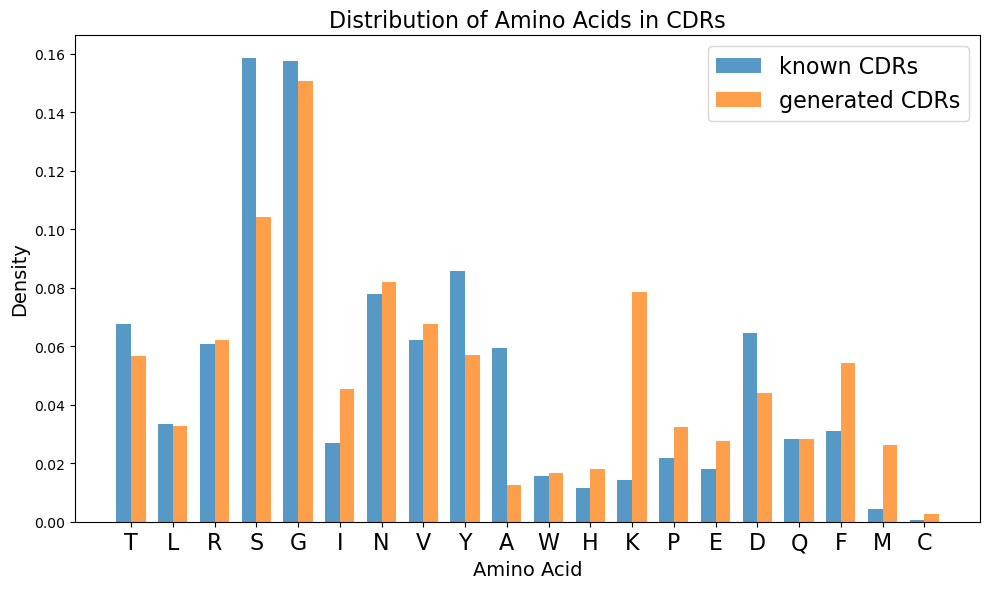

In [46]:
bar_width = 0.35

# Get the amino acids and their frequencies as lists
aa1 = list(avg_aa_distribution_col1.keys())
freq1 = list(avg_aa_distribution_col1.values())
aa2 = list(avg_aa_distribution_col2.keys())
freq2 = list(avg_aa_distribution_col2.values())

# Calculate the x positions for the bars
x_pos1 = np.arange(len(aa1))
x_pos2 = np.arange(len(aa2))

# Plot the distributions side by side
plt.figure(figsize=(10, 6))
plt.bar(x_pos1 - bar_width/2, freq1, bar_width, alpha=0.75, label='known CDRs')
plt.bar(x_pos2 + bar_width/2, freq2, bar_width, alpha=0.75, label='generated CDRs')
plt.title('Distribution of Amino Acids in CDRs', fontsize=16)
plt.xlabel('Amino Acid', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.xticks(np.arange(len(aa1)), aa1, fontsize=16)
plt.legend(fontsize=16)
plt.tight_layout()
plt.savefig('distribution_cdrs.png')
plt.show()
